In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
EPOCHS = 100

2023-11-27 10:35:38.363162: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 10:35:38.420921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 10:35:39.202875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Przygotowanie danych
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
#ile czasu zajmuje jeden krok dla poszczególnych wartości batch size?
batch_sizes = [8, 16, 32, 64, 128, 256]
histories = []

for batch_size in batch_sizes:
    print(f"Ustawiona wielość zbioru: {batch_size}")
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_data=(test_images, test_labels))
    histories.append(history)

Ustawiona wielość zbioru: 8


2023-11-27 10:35:40.768526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-27 10:35:40.768610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2023-11-27 10:35:40.768632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2023-11-27 10:35:40.768834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2023-11-27 10:35:40.768882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2023-11-27 10:35:40.768893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


Epoch 1/5
7500/7500 [==============================] - 31s 4ms/step - loss: 0.2147 - accuracy: 0.9369 - val_loss: 0.1059 - val_accuracy: 0.9666
Epoch 2/5
7500/7500 [==============================] - 29s 4ms/step - loss: 0.0946 - accuracy: 0.9714 - val_loss: 0.0961 - val_accuracy: 0.9718
Epoch 3/5
7500/7500 [==============================] - 30s 4ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0819 - val_accuracy: 0.9735
Epoch 4/5
7500/7500 [==============================] - 30s 4ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 5/5
7500/7500 [==============================] - 29s 4ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.0851 - val_accuracy: 0.9777
Ustawiona wielość zbioru: 16
Epoch 1/5
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2314 - accuracy: 0.9338 - val_loss: 0.1245 - val_accuracy: 0.9624
Epoch 2/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.1005 - accuracy: 0.9694 - val

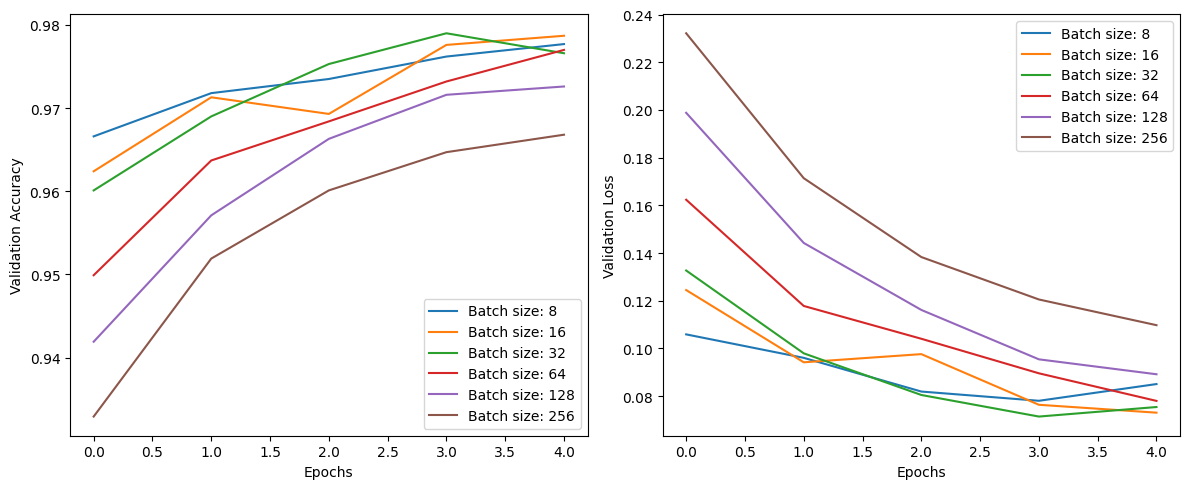

In [4]:
# Wygenerowanie wykresów
plt.figure(figsize=(12, 5))

# Dokładność
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Strata
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()